In [8]:
import numpy as np
target = np.array([[5,4,2,1],[0,1,-1,-1],[-1,-1,3,0],[1,1,-1,2]])
u,sigma,v = np.linalg.svd(target)
print(u)
print(sigma)
reconstructed = np.array([[sigma[0],0,0,0],[0,sigma[1],0,0],[0,0,sigma[2],0],[0,0,0,sigma[3]]])
print(v)
print(u@reconstructed@v)




[[-0.96790367  0.19333334  0.14155041  0.07581676]
 [-0.03103458 -0.29785012  0.59436412 -0.74636014]
 [ 0.11067974  0.85806346 -0.1607227  -0.47502137]
 [-0.22349347 -0.3709914  -0.77515353 -0.45994898]]
[6.96083727 3.72482616 2.07841263 0.59381439]
[[-0.74325708 -0.60866564 -0.19383301 -0.19880597]
 [-0.07044306 -0.20231055  0.97446121 -0.06733182]
 [ 0.04490024  0.2627654  -0.00879415 -0.96377434]
 [ 0.66377003 -0.72079881 -0.11303443 -0.16456499]]
[[ 5.00000000e+00  4.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 2.32365650e-16  1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  3.00000000e+00 -3.86718651e-16]
 [ 1.00000000e+00  1.00000000e+00 -1.00000000e+00  2.00000000e+00]]


In [13]:
#insufficient matrix
target2 = np.array([[5,4,2,1],[0,1,-1,-1],[-1,-1,3,0]])
u2,sigma2,v2 = np.linalg.svd(target2)
print(u2)


reconstructed2 = np.array([[sigma2[0],0,0,0],[0,sigma2[1],0,0],[0,0,sigma2[2],0]])
print(reconstructed2)
print('fisrt step',u2@reconstructed2)
print(u2@reconstructed2@v2)

[[ 0.99562039  0.09334784  0.00512048]
 [ 0.03113896 -0.38276645  0.92332021]
 [-0.08814989  0.91911698  0.38399684]]
[[6.80418172 0.         0.         0.        ]
 [0.         3.51583749 0.         0.        ]
 [0.         0.         1.15844632 0.        ]]
fisrt step [[ 6.77438206e+00  3.28195832e-01  5.93179850e-03  0.00000000e+00]
 [ 2.11875123e-01 -1.34574464e+00  1.06961690e+00  0.00000000e+00]
 [-5.99787895e-01  3.23146594e+00  4.44839723e-01  0.00000000e+00]]
[[ 5.00000000e+00  4.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 2.71982486e-16  1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [-1.00000000e+00 -1.00000000e+00  3.00000000e+00  1.70280315e-16]]


3
[[162 162 160 ... 165 172 146]
 [162 161 160 ... 168 177 150]
 [162 159 160 ... 141 124  89]
 ...
 [ 50  52  53 ...  70  87  90]
 [ 47  50  50 ...  86  98  98]
 [ 45  52  49 ...  96 103 105]]


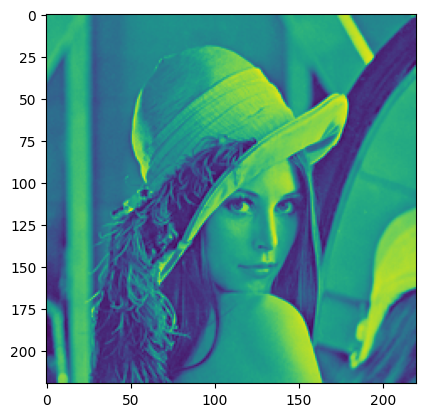

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("C:/Users/bests/OneDrive/Desktop/Meaningful-Modular-Topics/computer vision playground/Lenna_(test_image).png")
print(len(image[0][0]))
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("image",image)
plt.imshow(image1)
print(image1)


u (220, 220) sigma (220, 220) v (220, 220)
(220, 220)


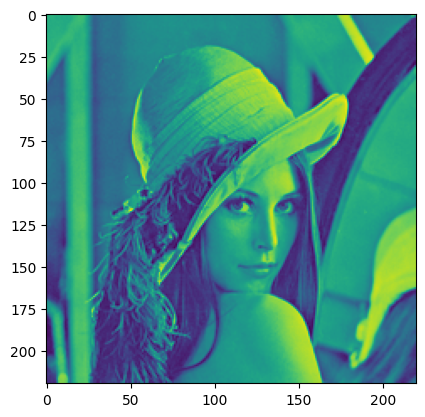

In [56]:
#SVD
import numpy as np
u,sigma,v = np.linalg.svd(image1)


#Trucate
def make_sigma(sigma):
    pointer = 0
    length = len(sigma)
    q = np.zeros((length,length))
    for i in range(length):
        q[i][i] = sigma[i]
    return q

recon = make_sigma(sigma)
print("u",np.shape(u),"sigma",np.shape(recon),"v",np.shape(v))
#print(np.shape(recon))

plt.imshow(u@recon@v)
print(np.shape(recon))
def image_quality(percentage,u,recon,v):
    
    #now I decide to only keep 80% of eigenvalues

    #u_improved = np.resize(u,(len(sigma),int(percentage*len(sigma)))) not sure
    u_improved = u[:,:int(percentage*len(sigma))]
    print("u_improved",np.shape(u_improved))
    #recon_improved = np.resize(recon,(len(sigma),int(percentage*len(sigma))))
    recon_improved = recon[:int(percentage*len(sigma)),:int(percentage*len(sigma))]

    print("recon_improved",np.shape(recon_improved))
    v_improved = v[:int(percentage*len(sigma)),:]
    print("v_improved",np.shape(v_improved))
    return u_improved@recon_improved@v_improved


u_improved (220, 22)
recon_improved (22, 22)
v_improved (22, 220)


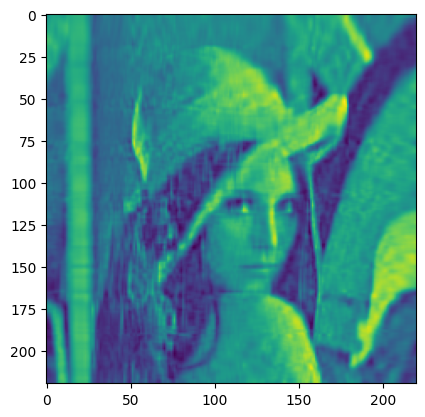

In [62]:
plt.imshow(image_quality(0.1,u,recon,v))

In [10]:

import numpy as np

def svd(A, max_iter=100000, tol=1e-6):
    """
    Compute the SVD of matrix A using the power iteration method.
    
    Arguments:
    A -- the matrix to compute the SVD of
    max_iter -- the maximum number of iterations to run (default 1000)
    tol -- the tolerance for convergence (default 1e-6)
    
    Returns:
    U -- the left singular vectors of A
    S -- the singular values of A
    Vt -- the right singular vectors of A
    """
    m, n = A.shape
    # Initialize U and V with random orthonormal matrices
    U = np.random.randn(m, m)
    Q, _ = np.linalg.qr(U)
    V = np.random.randn(n, n)
    Q, _ = np.linalg.qr(V)
    # Initialize the singular values to zero
    S = np.zeros((m, n))
    
    # Run the power iteration method to compute the SVD
    for i in range(max_iter):
        # Compute the singular values and update U
        S_old = S.copy()
        S = A.T @ U @ V
        U, _ = np.linalg.qr(A @ V @ S.T)
        # Compute the singular values and update V
        S = A.T @ U @ V
        V, _ = np.linalg.qr(A.T @ U @ S)
        # Check for convergence
        err = np.linalg.norm(S - S_old)
        print(err)
        if err < tol:
            break
    
    return U, np.diag(S), V.T




In [14]:
def svd(A, num_iters=1000, tol=1e-8):
    """
    Compute the singular value decomposition of a matrix using power iteration method.
    
    Arguments:
    A -- the matrix to compute the SVD of
    num_iters -- the maximum number of iterations (default 1000)
    tol -- the tolerance for convergence (default 1e-8)
    
    Returns:
    U -- the left singular vectors of A
    S -- the singular values of A
    Vt -- the right singular vectors of A
    """
    # Compute A^T @ A and initialize v as a random vector
    ATA = A.T @ A
    n = ATA.shape[0]
    v = np.random.randn(n)
    
    # Run power iterations
    for i in range(num_iters):
        Av = A @ v
        sigma = np.linalg.norm(Av)
        if sigma < tol:
            break
        v = Av / sigma
        
    # Compute the singular value and right singular vector
    u = A @ v / sigma
    vt = v.T @ ATA / sigma
    
    # Compute the singular values and sort them in descending order
    s = np.sqrt(sigma)
    idx = np.argsort(s)[::-1]
    s = s[idx]
    u = u[:, idx]
    vt = vt[idx, :]
    
    return u, s, vt

In [16]:
def svd(A, num_iters=1000, tol=1e-8):
    """
    Compute the singular value decomposition of a matrix using power iteration method.
    
    Arguments:
    A -- the matrix to compute the SVD of
    num_iters -- the maximum number of iterations (default 1000)
    tol -- the tolerance for convergence (default 1e-8)
    
    Returns:
    U -- the left singular vectors of A
    S -- the singular values of A
    Vt -- the right singular vectors of A
    """
    # Compute A^T @ A and initialize v as a random vector
    ATA = A.T @ A
    n = ATA.shape[0]
    v = np.random.randn(n)
    
    # Run power iterations
    for i in range(num_iters):
        Av = A @ v
        sigma = np.linalg.norm(Av)
        if sigma < tol:
            break
        v = Av / sigma
        
    # Compute the singular value and right singular vector
    u = A @ v / sigma
    vt = v.T @ ATA / sigma
    
    # Compute the singular values and sort them in descending order
    s = np.sqrt(np.diag(ATA))
    idx = np.argsort(s)[::-1]
    s = s[idx]
    u = u[:, idx]
    vt = vt[idx, :]
    
    return u, s, vt


In [22]:
def svd(A, num_iters=10000, tol=1e-6):
    """
    Compute the Singular Value Decomposition of a matrix A using the power method.

    Parameters:
        A (numpy.ndarray): The input matrix.
        num_iters (int): The maximum number of iterations to run.
        tol (float): The tolerance for convergence.

    Returns:
        U (numpy.ndarray): The left singular vectors of A.
        S (numpy.ndarray): The singular values of A.
        Vt (numpy.ndarray): The right singular vectors of A.
    """
    m, n = A.shape

    # Initialize the left singular vectors
    U = np.random.randn(m, m)
    for i in range(num_iters):
        # Compute the matrix-vector product A^T A U
        U_new = A @ A.T @ U
        # Orthogonalize the new left singular vectors
        Q, R = np.linalg.qr(U_new)
        U_new = Q

        # Compute the singular values and right singular vectors
        Vt = A.T @ U_new
        s = np.linalg.norm(Vt, axis=0)
        idx = np.argsort(s)[::-1]
        s = s[idx]
        Vt = Vt[:, idx]
        Vt = Vt.T

        # Check for convergence
        if np.linalg.norm(U_new - U) < tol:
        
            break
        print(np.linalg.norm(U_new - U))
        U = U_new

    return U, s, Vt

In [31]:
def svd(A, num_iters=100, tol=1e-6):
    m, n = A.shape
    u = np.random.randn(m, m)
    s = np.zeros(n)
    vt = np.random.randn(n, n)

    for i in range(num_iters):
        v_old = vt.T
        u = A @ vt
        u_norm = np.linalg.norm(u, axis=0)
        u_norm[u_norm == 0] = 1
        u /= u_norm
        vt = u.T @ A
        s_new = np.linalg.norm(vt, axis=1)
        if np.max(np.abs(s_new - s)) < tol:
            break
        s = s_new
        print(np.max(np.abs(s_new - s)))
    return u, s, vt.T

In [42]:
import numpy as np

def svd(A, num_iters=100000, tol=1e-6):
    m, n = A.shape
    u = np.random.randn(m, m)
    s = np.zeros(n)
    vt = np.random.randn(n, n)
    
    for i in range(num_iters):
        v = A.T @ u
        v_norm = np.linalg.norm(v, axis=0)
        vt = v / v_norm
        u = A @ vt
        u_norm = np.linalg.norm(u, axis=0)
        u = u / u_norm
        s_new = np.linalg.norm(A @ vt, axis=0)
        if np.max(np.abs(s_new - s)) < tol:
            break
        s = s_new
    
    idx = np.argsort(s)[::-1]
    s = s[idx]
    u = u[:, idx]
    vt = vt[idx, :]
    
    return u, s, vt

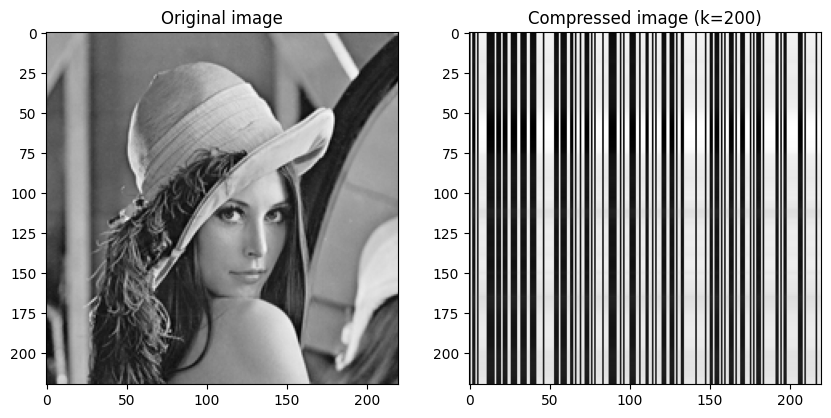

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compress_image(image_path, k):
    """
    Compress an image by keeping only the first k singular values of its SVD.
    
    Arguments:
    image_path -- the path to the image file
    k -- the number of singular values to keep
    
    Returns:
    None
    """
    # Load the image as a NumPy array
    image = np.array(Image.open(image_path).convert('L'))
    
    # Compute the SVD of the image
    U, S, Vt = svd(image)
    
    # Create a new diagonal matrix with the desired number of singular values
    S_compressed = np.zeros_like(S)
    S_compressed[:k] = S[:k]
    
    # Reconstruct the compressed image
    compressed_image = U @ np.diag(S_compressed) @ Vt
    
    # Plot the original and compressed images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title("Original image")
    axs[1].imshow(compressed_image, cmap='gray')
    axs[1].set_title(f"Compressed image (k={k})")
    plt.show()
compress_image("C:/Users/bests/OneDrive/Desktop/Meaningful-Modular-Topics/computer vision playground/Lenna_(test_image).png", 200)